<a href="https://colab.research.google.com/github/VitorFRodrigues/Data-Science-Bootcamp/blob/main/Proj05_final/Notebook/Bootcamp_Proj_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Projeto Módulo 5 do Bootcamp Data Science 3 - Criação de modelo preditivo para decisão de paciente se encontra apto ou não para ingressar na UTI
---
Autor: Vitor Rodrigues

e-mail: vitorfbaiano@gmail.com

---

## 1.Introdução

Explicar um pouco sobre o problema proposto, a quantidade de dados coletado pelo Sirio Libanes, como e onde estes dados são encontrados.

## 2.Objetivos

Considerando o que foi explanado na introdução, este projeto tem como objetivo a criação de um modelo decisório para ingresso de pacientes na UTI dados certas variárieis. Para isto, serão realizados os seguintes passos:

- Importação dos dados do Sirio Libanês;
- Realização de limpeza dos dados;
- Criação de 5 modelos preditivos;
- Alteração de hiperparametros para atingir melhor acurácia em cada modelo;
- Remover informações correlacionadas que dificultem o poder decisório de cada modelo;
- Aplicar os modelos em novo banco de dados para buscar melhor acurácia;
- Apurar modelo preditivo e salva-lo;

Tipos principais de modelos preditivos:


*   Classificação: escolha booleana (Verdadeiro ou Falso)
*   Regressão: previsão dentro de um intervalo ]-inf,+inf[ 



## 3.Preparação dos dados

Falar do Sirio Libanes e como este levantou estes dados. Informar a metodologia das 

Regras dos dados recebidos
- Alguns itens NaN;
- 384 pacientes (vide numero máximo no PACIENTE_VISIT_IDENTIFIER)
- Cada paciente separado em 5 janelas de tempo (vide coluna Window)

In [41]:
import pandas as pd

Sirio_Libanes_URL = 'https://github.com/VitorFRodrigues/Data-Science-Bootcamp/blob/main/Proj05_final/dados/Kaggle_Sirio_Libanes_ICU_Prediction.xlsx?raw=true'

In [42]:
dados = pd.read_excel(Sirio_Libanes_URL)
dados

,PATIENT_VISIT_IDENTIFIER,AGE_ABOVE65,AGE_PERCENTIL,GENDER,DISEASE GROUPING 1,DISEASE GROUPING 2,DISEASE GROUPING 3,DISEASE GROUPING 4,DISEASE GROUPING 5,DISEASE GROUPING 6,...,TEMPERATURE_DIFF,OXYGEN_SATURATION_DIFF,BLOODPRESSURE_DIASTOLIC_DIFF_REL,BLOODPRESSURE_SISTOLIC_DIFF_REL,HEART_RATE_DIFF_REL,RESPIRATORY_RATE_DIFF_REL,TEMPERATURE_DIFF_REL,OXYGEN_SATURATION_DIFF_REL,WINDOW,ICU
0,0,1,60th,0,0.0,0.0,0.0,0.0,1.0,1.0,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0-2,0
1,0,1,60th,0,0.0,0.0,0.0,0.0,1.0,1.0,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,2-4,0
2,0,1,60th,0,0.0,0.0,0.0,0.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4-6,0
3,0,1,60th,0,0.0,0.0,0.0,0.0,1.0,1.0,...,-1.000000,-1.000000,NaN,NaN,NaN,NaN,-1.000000,-1.000000,6-12,0
4,0,1,60th,0,0.0,0.0,0.0,0.0,1.0,1.0,...,-0.238095,-0.818182,-0.389967,0.407558,-0.230462,0.096774,-0.242282,-0.814433,ABOVE_12,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1920,384,0,50th,1,0.0,0.0,0.0,0.0,0.0,0.0,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0-2,0
1921,384,0,50th,1,0.0,0.0,0.0,0.0,0.0,0.0,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,2-4,0
1922,384,0,50th,1,0.0,0.0,0.0,0.0,0.0,0.0,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,4-6,0
1923,384,0,50th,1,0.0,0.0,0.0,0.0,0.0,0.0,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,6-12,0


dar informações dos dados, numero de linhas e colunas, o que as colunas representam (falar dos 54 tipos), falar que o paciente está subdividido em 5 janelas. Informar a metodologia da janela.

In [43]:
dados[['PATIENT_VISIT_IDENTIFIER', 'WINDOW']].head()

,PATIENT_VISIT_IDENTIFIER,WINDOW
0,0,0-2
1,0,2-4
2,0,4-6
3,0,6-12
4,0,ABOVE_12


puxar o dados.describe(). Informar que este descreve todas as colunas que são do tipo inteira ou categórica

In [44]:
dados.describe()

,PATIENT_VISIT_IDENTIFIER,AGE_ABOVE65,GENDER,DISEASE GROUPING 1,DISEASE GROUPING 2,DISEASE GROUPING 3,DISEASE GROUPING 4,DISEASE GROUPING 5,DISEASE GROUPING 6,HTN,...,RESPIRATORY_RATE_DIFF,TEMPERATURE_DIFF,OXYGEN_SATURATION_DIFF,BLOODPRESSURE_DIASTOLIC_DIFF_REL,BLOODPRESSURE_SISTOLIC_DIFF_REL,HEART_RATE_DIFF_REL,RESPIRATORY_RATE_DIFF_REL,TEMPERATURE_DIFF_REL,OXYGEN_SATURATION_DIFF_REL,ICU
count,1925.000000,1925.000000,1925.000000,1920.000000,1920.000000,1920.000000,1920.000000,1920.000000,1920.000000,1920.000000,...,1177.000000,1231.000000,1239.000000,1240.000000,1240.000000,1240.000000,1177.000000,1231.000000,1239.000000,1925.000000
mean,192.000000,0.467532,0.368831,0.108333,0.028125,0.097917,0.019792,0.128125,0.046875,0.213021,...,-0.703683,-0.770338,-0.887196,-0.786997,-0.715950,-0.817800,-0.719147,-0.771327,-0.886982,0.267532
std,111.168431,0.499074,0.482613,0.310882,0.165373,0.297279,0.139320,0.334316,0.211426,0.409549,...,0.482097,0.319001,0.296147,0.324754,0.419103,0.270217,0.446600,0.317694,0.296772,0.442787
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.000000
25%,96.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.000000
50%,192.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-1.000000,-0.976190,-0.979798,-1.000000,-0.984944,-0.989822,-1.000000,-0.975924,-0.980333,0.000000
75%,288.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-0.647059,-0.595238,-0.878788,-0.645482,-0.522176,-0.662529,-0.634409,-0.594677,-0.880155,1.000000
max,384.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Mostrar a anomalia q existem apenas 229 colunas do tipo inteiras ou categóricas. Vamos informar quais são as colunas não categorizadas

In [45]:
for coluna in dados.columns:
  if coluna not in dados.describe().columns:
    print(coluna)

AGE_PERCENTIL
WINDOW


In [46]:
dados[['AGE_PERCENTIL', 'WINDOW']]

,AGE_PERCENTIL,WINDOW
0,60th,0-2
1,60th,2-4
2,60th,4-6
3,60th,6-12
4,60th,ABOVE_12
...,...,...
1920,50th,0-2
1921,50th,2-4
1922,50th,4-6
1923,50th,6-12


Informar que a janela window será agrupada posteriormente e por isso não será categorizada. Já a coluna AGE_PERCENTIL indica a.... e será categorizada abaixo:

Para categorizar, existem algumas metodologias:
1. Find and Replace;
2. Label Encoding;
3. One Hot Encoding
4. OriginalEncoder (do Scikit-Learn)
5. OneHotEncoder (do Scikit-Learn)

Será usada a primeira. Para ver como funciona as demais metodologias de categorização, vide [link](https://github.com/VitorFRodrigues/Data-Science-Bootcamp/blob/main/Proj05_final/Notebook/Bootcamp_Proj_05-Metodologias_de_Categorizacao.ipynb).


In [47]:
dados_categorizar = dados['AGE_PERCENTIL']
dados_categorizar.unique()

array(['60th', '90th', '10th', '40th', '70th', '20th', '50th', '80th',
       '30th', 'Above 90th'], dtype=object)

In [48]:
dados_categorizar.value_counts()

20th          215
10th          205
30th          205
40th          200
70th          195
50th          190
80th          190
60th          185
Above 90th    185
90th          155
Name: AGE_PERCENTIL, dtype: int64

In [49]:
substituir = {"60th": 60, 
              "10th": 10, 
              "40th": 40, 
              "70th": 70, 
              "20th": 20, 
              "50th": 50, 
              "80th": 80, 
              "30th": 30,
              "90th": 90, 
              "Above 90th": 100}
dados_categorizado_find_replace = dados_categorizar.replace(substituir)
dados_categorizado_find_replace

0       60
1       60
2       60
3       60
4       60
        ..
1920    50
1921    50
1922    50
1923    50
1924    50
Name: AGE_PERCENTIL, Length: 1925, dtype: int64

A partir deste momento, estamos modificando os dados originais, sendo assim estes serão adicionados em novo dataframe dados_limpos.

In [50]:
dados_limpos = dados
dados_limpos['AGE_PERCENTIL'] = dados_categorizado_find_replace

In [51]:
dados_limpos.describe()

,PATIENT_VISIT_IDENTIFIER,AGE_ABOVE65,AGE_PERCENTIL,GENDER,DISEASE GROUPING 1,DISEASE GROUPING 2,DISEASE GROUPING 3,DISEASE GROUPING 4,DISEASE GROUPING 5,DISEASE GROUPING 6,...,RESPIRATORY_RATE_DIFF,TEMPERATURE_DIFF,OXYGEN_SATURATION_DIFF,BLOODPRESSURE_DIASTOLIC_DIFF_REL,BLOODPRESSURE_SISTOLIC_DIFF_REL,HEART_RATE_DIFF_REL,RESPIRATORY_RATE_DIFF_REL,TEMPERATURE_DIFF_REL,OXYGEN_SATURATION_DIFF_REL,ICU
count,1925.000000,1925.000000,1925.000000,1925.000000,1920.000000,1920.000000,1920.000000,1920.000000,1920.000000,1920.000000,...,1177.000000,1231.000000,1239.000000,1240.000000,1240.000000,1240.000000,1177.000000,1231.000000,1239.000000,1925.000000
mean,192.000000,0.467532,53.194805,0.368831,0.108333,0.028125,0.097917,0.019792,0.128125,0.046875,...,-0.703683,-0.770338,-0.887196,-0.786997,-0.715950,-0.817800,-0.719147,-0.771327,-0.886982,0.267532
std,111.168431,0.499074,28.673479,0.482613,0.310882,0.165373,0.297279,0.139320,0.334316,0.211426,...,0.482097,0.319001,0.296147,0.324754,0.419103,0.270217,0.446600,0.317694,0.296772,0.442787
min,0.000000,0.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.000000
25%,96.000000,0.000000,30.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.000000
50%,192.000000,0.000000,50.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-1.000000,-0.976190,-0.979798,-1.000000,-0.984944,-0.989822,-1.000000,-0.975924,-0.980333,0.000000
75%,288.000000,1.000000,80.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-0.647059,-0.595238,-0.878788,-0.645482,-0.522176,-0.662529,-0.634409,-0.594677,-0.880155,1.000000
max,384.000000,1.000000,100.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Agora temos todas as variaveis categoricas necessárias para aplicação do modelo. Agora podemos tratar os dados. Como já foi explicado, temos 384 pacientes subdivididos em 5 janelas de tempo.

"Se a pessoa ta na UTI eu não posso usar aquela informação. Pára pra pensar em um caso específico, se a pessoa entra no Hospital e já está na UTI, nas 2 primeiras horas já entra na UTI, a gente não pode usar aquele paciente, aquele paciente vai embora por que na primeira leitura ele já está na UTI."

Explicar que não faz sentido usar no nosso projeto aqueles paciente que já se encontram na UTI nas 2 primeiras horas, sendo assim, o código abaixo vai retirar os pacientes que estão na UTI nas 2 primeiras horas

In [52]:
a_remover = dados_limpos.query("WINDOW=='0-2' and ICU==1")['PATIENT_VISIT_IDENTIFIER'].values
dados_limpos = dados_limpos.query('PATIENT_VISIT_IDENTIFIER not in @a_remover')
dados_limpos.describe()

,PATIENT_VISIT_IDENTIFIER,AGE_ABOVE65,AGE_PERCENTIL,GENDER,DISEASE GROUPING 1,DISEASE GROUPING 2,DISEASE GROUPING 3,DISEASE GROUPING 4,DISEASE GROUPING 5,DISEASE GROUPING 6,...,RESPIRATORY_RATE_DIFF,TEMPERATURE_DIFF,OXYGEN_SATURATION_DIFF,BLOODPRESSURE_DIASTOLIC_DIFF_REL,BLOODPRESSURE_SISTOLIC_DIFF_REL,HEART_RATE_DIFF_REL,RESPIRATORY_RATE_DIFF_REL,TEMPERATURE_DIFF_REL,OXYGEN_SATURATION_DIFF_REL,ICU
count,1765.000000,1765.000000,1765.000000,1765.000000,1760.00000,1760.000000,1760.000000,1760.000000,1760.000000,1760.000000,...,1053.000000,1103.000000,1111.000000,1108.000000,1108.000000,1112.000000,1053.000000,1103.000000,1111.000000,1765.000000
mean,192.835694,0.456091,52.662890,0.379603,0.11250,0.026136,0.101705,0.021591,0.132955,0.049432,...,-0.721133,-0.775375,-0.892071,-0.796061,-0.729520,-0.819947,-0.733648,-0.776424,-0.891971,0.201133
std,110.481302,0.498209,28.882085,0.485426,0.31607,0.159586,0.302345,0.145385,0.339622,0.216829,...,0.466468,0.308266,0.288869,0.311507,0.402389,0.267913,0.433956,0.306903,0.289193,0.400961
min,0.000000,0.000000,10.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.000000
25%,98.000000,0.000000,30.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.000000
50%,192.000000,0.000000,50.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-1.000000,-0.976190,-0.979798,-1.000000,-1.000000,-1.000000,-1.000000,-0.976451,-0.980533,0.000000
75%,289.000000,1.000000,80.000000,1.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-0.647059,-0.595238,-0.878788,-0.647275,-0.541827,-0.664947,-0.681582,-0.595796,-0.881390,0.000000
max,384.000000,1.000000,100.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,0.333333,1.000000,1.000000,1.000000,1.000000,1.000000,0.329660,1.000000,1.000000


Pode ser visto que a contagem anterior era 1.925 e agora estamos com 1.765. A diferença é igual a 160 e como temos 5 PATIENT_VISIT_IDENTIFIER para cada paciente, subdividimos o valor por 5 e descobrimos que 32 pacientes foram removidos da lista.

Próximo ponto será manipulação de valores nulos.

In [53]:
is_NaN = dados_limpos.isnull()
row_has_NaN = is_NaN.any(axis=1)
rows_with_NaN = dados_limpos[row_has_NaN]
rows_with_NaN.describe()

,PATIENT_VISIT_IDENTIFIER,AGE_ABOVE65,AGE_PERCENTIL,GENDER,DISEASE GROUPING 1,DISEASE GROUPING 2,DISEASE GROUPING 3,DISEASE GROUPING 4,DISEASE GROUPING 5,DISEASE GROUPING 6,...,RESPIRATORY_RATE_DIFF,TEMPERATURE_DIFF,OXYGEN_SATURATION_DIFF,BLOODPRESSURE_DIASTOLIC_DIFF_REL,BLOODPRESSURE_SISTOLIC_DIFF_REL,HEART_RATE_DIFF_REL,RESPIRATORY_RATE_DIFF_REL,TEMPERATURE_DIFF_REL,OXYGEN_SATURATION_DIFF_REL,ICU
count,1290.000000,1290.000000,1290.000000,1290.000000,1285.000000,1285.000000,1285.000000,1285.000000,1285.000000,1285.000000,...,578.000000,628.000000,636.000000,633.000000,633.000000,637.000000,578.000000,628.000000,636.000000,1290.000000
mean,192.041085,0.456589,52.627907,0.380620,0.098054,0.021012,0.091829,0.018677,0.124514,0.042802,...,-0.950132,-0.951054,-0.981196,-0.956410,-0.943864,-0.965528,-0.953988,-0.951721,-0.981114,0.124806
std,110.573927,0.498305,28.725060,0.485728,0.297504,0.143479,0.288897,0.135434,0.330295,0.202488,...,0.138757,0.102627,0.041803,0.106839,0.136183,0.082787,0.125805,0.100860,0.043495,0.330627
min,0.000000,0.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.000000
25%,97.250000,0.000000,30.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.000000
50%,190.500000,0.000000,50.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.000000
75%,288.750000,1.000000,80.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-1.000000,-0.952381,-0.979798,-0.986874,-0.976560,-0.986164,-1.000000,-0.952248,-0.979921,0.000000
max,384.000000,1.000000,100.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.294118,-0.238095,-0.474747,0.027425,0.092501,-0.417142,0.340502,-0.285468,-0.392004,1.000000


Várias linhas deste DataFrame possui pelo menos uma coluna contendo NaN (Not-a-Number). O código anterior mostra que das 1765 linhas, 1290 possuem um valor nulo em alguma coluna, representando mais de 70% dos dados. Retirar todas estas linhas não faz sentido e nem auxiliará na criação do modelo preditivo. 

Sendo assim, vamos preencher estes valores nulos com informações. Mas não serão qualquer números, vamos separar cada paciente em suas respectivas janelas de tempo e preencher os valores nulos com o mesmo número indicado na linha anterior ou posterior.

 Para melhor exemplificar o que estou falando, vide este [link](https://github.com/VitorFRodrigues/Data-Science-Bootcamp/blob/main/Proj05_final/Notebook/Previs%C3%A3o_de_Incrementos.ipynb).

Fazendo uma varredura do Dataframe e retiro as janelas após primeiro indicativo de entrada na UTI. Ex.:

In [54]:
dados_exemplo = pd.DataFrame([[1, None, 1, 0], [1, 1, 2, 0], [1, None, 3, 1],
                           [2, None, 1, 0], [2, None, 2, 1], [2, 6, 3, 1]
                          ], columns=['usuario', 'medida', 'janela', 'UTI'])
dados_exemplo

,usuario,medida,janela,UTI
0,1,NaN,1,0
1,1,1.0,2,0
2,1,NaN,3,1
3,2,NaN,1,0
4,2,NaN,2,1
5,2,6.0,3,1


In [55]:
dados_exemplo_pos_limpeza = pd.DataFrame([[1, None, 1, 0], [1, 1, 2, 0], [1, None, 3, 1],
                           [2, None, 1, 0], [2, None, 2, 1]
                          ], columns=['usuario', 'medida', 'janela', 'UTI'])
dados_exemplo_pos_limpeza

,usuario,medida,janela,UTI
0,1,NaN,1,0
1,1,1.0,2,0
2,1,NaN,3,1
3,2,NaN,1,0
4,2,NaN,2,1


Fazendo uma varredura do Dataframe e retiro as janelas após primeiro indicativo de entrada na UTI.

In [56]:
varredura = dados_limpos.reset_index()
linhas_a_remover = []
aux = 0
for i in range(0, len(varredura), 5):
  for j in range(0,5):
    aux += varredura['ICU'][i+j]
    if aux > 1:
      linhas_a_remover.append(i+j)
  aux = 0

In [57]:
print(len(linhas_a_remover))
print(len(dados_limpos))

192
1765


In [58]:
dados_limpos.drop(dados_limpos.index[[linhas_a_remover]], inplace=True)
import warnings
warnings.simplefilter(action='ignore', category=Warning)

/usr/local/lib/python3.7/dist-packages/pandas/core/indexes/base.py:4616: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  result = getitem(key)
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Conforme informado abaixo, as linhas da varredura foram removidas 1765-192=1573

In [59]:
dados_limpos

,PATIENT_VISIT_IDENTIFIER,AGE_ABOVE65,AGE_PERCENTIL,GENDER,DISEASE GROUPING 1,DISEASE GROUPING 2,DISEASE GROUPING 3,DISEASE GROUPING 4,DISEASE GROUPING 5,DISEASE GROUPING 6,...,TEMPERATURE_DIFF,OXYGEN_SATURATION_DIFF,BLOODPRESSURE_DIASTOLIC_DIFF_REL,BLOODPRESSURE_SISTOLIC_DIFF_REL,HEART_RATE_DIFF_REL,RESPIRATORY_RATE_DIFF_REL,TEMPERATURE_DIFF_REL,OXYGEN_SATURATION_DIFF_REL,WINDOW,ICU
0,0,1,60,0,0.0,0.0,0.0,0.0,1.0,1.0,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0-2,0
1,0,1,60,0,0.0,0.0,0.0,0.0,1.0,1.0,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,2-4,0
2,0,1,60,0,0.0,0.0,0.0,0.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4-6,0
3,0,1,60,0,0.0,0.0,0.0,0.0,1.0,1.0,...,-1.000000,-1.000000,NaN,NaN,NaN,NaN,-1.000000,-1.000000,6-12,0
4,0,1,60,0,0.0,0.0,0.0,0.0,1.0,1.0,...,-0.238095,-0.818182,-0.389967,0.407558,-0.230462,0.096774,-0.242282,-0.814433,ABOVE_12,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1920,384,0,50,1,0.0,0.0,0.0,0.0,0.0,0.0,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0-2,0
1921,384,0,50,1,0.0,0.0,0.0,0.0,0.0,0.0,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,2-4,0
1922,384,0,50,1,0.0,0.0,0.0,0.0,0.0,0.0,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,4-6,0
1923,384,0,50,1,0.0,0.0,0.0,0.0,0.0,0.0,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,6-12,0


Agora podemos preencher os valores NaN para frente e para trás.

In [60]:
def preenche_tabela (dados):
    features_continuas_colunas = dados.iloc[:, 13:-2].columns
    features_continuas = dados.groupby('PATIENT_VISIT_IDENTIFIER', as_index=False)[features_continuas_colunas].fillna(method='bfill').fillna(method='ffill')
    features_categoricas = dados.iloc[:, :13]
    saida = dados.iloc[:, -2:]
    dados_finais = pd.concat([features_categoricas, features_continuas, saida], ignore_index=True, axis=1)
    dados_finais.columns = dados.columns
    return dados_finais

In [61]:
dados_limpos = preenche_tabela(dados_limpos)
dados_limpos.head()

,PATIENT_VISIT_IDENTIFIER,AGE_ABOVE65,AGE_PERCENTIL,GENDER,DISEASE GROUPING 1,DISEASE GROUPING 2,DISEASE GROUPING 3,DISEASE GROUPING 4,DISEASE GROUPING 5,DISEASE GROUPING 6,...,TEMPERATURE_DIFF,OXYGEN_SATURATION_DIFF,BLOODPRESSURE_DIASTOLIC_DIFF_REL,BLOODPRESSURE_SISTOLIC_DIFF_REL,HEART_RATE_DIFF_REL,RESPIRATORY_RATE_DIFF_REL,TEMPERATURE_DIFF_REL,OXYGEN_SATURATION_DIFF_REL,WINDOW,ICU
0,0,1,60,0,0.0,0.0,0.0,0.0,1.0,1.0,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0-2,0
1,0,1,60,0,0.0,0.0,0.0,0.0,1.0,1.0,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,2-4,0
2,0,1,60,0,0.0,0.0,0.0,0.0,1.0,1.0,...,-1.000000,-1.000000,-0.389967,0.407558,-0.230462,0.096774,-1.000000,-1.000000,4-6,0
3,0,1,60,0,0.0,0.0,0.0,0.0,1.0,1.0,...,-1.000000,-1.000000,-0.389967,0.407558,-0.230462,0.096774,-1.000000,-1.000000,6-12,0
4,0,1,60,0,0.0,0.0,0.0,0.0,1.0,1.0,...,-0.238095,-0.818182,-0.389967,0.407558,-0.230462,0.096774,-0.242282,-0.814433,ABOVE_12,1


In [62]:
dados_limpos.describe()

,PATIENT_VISIT_IDENTIFIER,AGE_ABOVE65,AGE_PERCENTIL,GENDER,DISEASE GROUPING 1,DISEASE GROUPING 2,DISEASE GROUPING 3,DISEASE GROUPING 4,DISEASE GROUPING 5,DISEASE GROUPING 6,...,RESPIRATORY_RATE_DIFF,TEMPERATURE_DIFF,OXYGEN_SATURATION_DIFF,BLOODPRESSURE_DIASTOLIC_DIFF_REL,BLOODPRESSURE_SISTOLIC_DIFF_REL,HEART_RATE_DIFF_REL,RESPIRATORY_RATE_DIFF_REL,TEMPERATURE_DIFF_REL,OXYGEN_SATURATION_DIFF_REL,ICU
count,1573.000000,1573.000000,1573.000000,1573.000000,1568.000000,1568.000000,1568.000000,1568.000000,1568.000000,1568.000000,...,1573.000000,1573.000000,1573.000000,1573.000000,1573.000000,1573.000000,1573.000000,1573.000000,1573.000000,1573.000000
mean,194.436745,0.425302,50.584870,0.380801,0.101403,0.024235,0.092474,0.018495,0.120536,0.049745,...,-0.829849,-0.848772,-0.930719,-0.859662,-0.817596,-0.875762,-0.833602,-0.849792,-0.930682,0.103624
std,110.802448,0.494546,28.343382,0.485738,0.301958,0.153826,0.289787,0.134775,0.325691,0.217487,...,0.333809,0.251921,0.220481,0.244270,0.318429,0.217787,0.318533,0.250304,0.221216,0.304869
min,0.000000,0.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.000000
25%,99.000000,0.000000,30.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.000000
50%,194.000000,0.000000,50.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.000000
75%,292.000000,1.000000,70.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-0.764706,-0.785714,-0.939394,-0.788280,-0.738255,-0.813580,-0.787721,-0.795326,-0.938475,0.000000
max,384.000000,1.000000,100.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.941176,0.333333,0.939394,0.695652,0.830052,0.444757,0.806452,0.329660,0.958324,1.000000


Vamos fazer nova verificação da tabela em busca de itens com NaN.

In [63]:
is_NaN = dados_limpos.isnull()
row_has_NaN = is_NaN.any(axis=1)
rows_with_NaN = dados_limpos[row_has_NaN]
rows_with_NaN.describe()

,PATIENT_VISIT_IDENTIFIER,AGE_ABOVE65,AGE_PERCENTIL,GENDER,DISEASE GROUPING 1,DISEASE GROUPING 2,DISEASE GROUPING 3,DISEASE GROUPING 4,DISEASE GROUPING 5,DISEASE GROUPING 6,...,RESPIRATORY_RATE_DIFF,TEMPERATURE_DIFF,OXYGEN_SATURATION_DIFF,BLOODPRESSURE_DIASTOLIC_DIFF_REL,BLOODPRESSURE_SISTOLIC_DIFF_REL,HEART_RATE_DIFF_REL,RESPIRATORY_RATE_DIFF_REL,TEMPERATURE_DIFF_REL,OXYGEN_SATURATION_DIFF_REL,ICU
count,5.0,5.0,5.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,...,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000e+00,5.000000,5.000000,5.0
mean,199.0,0.0,10.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,...,-0.823529,-0.595238,-0.919192,-0.608696,-0.607383,-0.790037,-8.172043e-01,-0.599662,-0.918403,0.0
std,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.241267e-16,0.000000,0.000000,0.0
min,199.0,0.0,10.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,...,-0.823529,-0.595238,-0.919192,-0.608696,-0.607383,-0.790037,-8.172043e-01,-0.599662,-0.918403,0.0
25%,199.0,0.0,10.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,...,-0.823529,-0.595238,-0.919192,-0.608696,-0.607383,-0.790037,-8.172043e-01,-0.599662,-0.918403,0.0
50%,199.0,0.0,10.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,...,-0.823529,-0.595238,-0.919192,-0.608696,-0.607383,-0.790037,-8.172043e-01,-0.599662,-0.918403,0.0
75%,199.0,0.0,10.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,...,-0.823529,-0.595238,-0.919192,-0.608696,-0.607383,-0.790037,-8.172043e-01,-0.599662,-0.918403,0.0
max,199.0,0.0,10.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,...,-0.823529,-0.595238,-0.919192,-0.608696,-0.607383,-0.790037,-8.172043e-01,-0.599662,-0.918403,0.0


Coforme mostrado, ainda existe 1 paciente com linhas nulas. Vamos retirar esta linha.

In [64]:
dados_limpos = dados_limpos.dropna()
dados_limpos.describe()

,PATIENT_VISIT_IDENTIFIER,AGE_ABOVE65,AGE_PERCENTIL,GENDER,DISEASE GROUPING 1,DISEASE GROUPING 2,DISEASE GROUPING 3,DISEASE GROUPING 4,DISEASE GROUPING 5,DISEASE GROUPING 6,...,RESPIRATORY_RATE_DIFF,TEMPERATURE_DIFF,OXYGEN_SATURATION_DIFF,BLOODPRESSURE_DIASTOLIC_DIFF_REL,BLOODPRESSURE_SISTOLIC_DIFF_REL,HEART_RATE_DIFF_REL,RESPIRATORY_RATE_DIFF_REL,TEMPERATURE_DIFF_REL,OXYGEN_SATURATION_DIFF_REL,ICU
count,1568.000000,1568.000000,1568.000000,1568.000000,1568.000000,1568.000000,1568.000000,1568.000000,1568.000000,1568.000000,...,1568.000000,1568.000000,1568.000000,1568.000000,1568.000000,1568.000000,1568.000000,1568.000000,1568.000000,1568.000000
mean,194.422194,0.426658,50.714286,0.382015,0.101403,0.024235,0.092474,0.018495,0.120536,0.049745,...,-0.829869,-0.849581,-0.930755,-0.860462,-0.818267,-0.876036,-0.833654,-0.850589,-0.930722,0.103954
std,110.978782,0.494750,28.295550,0.486035,0.301958,0.153826,0.289787,0.134775,0.325691,0.217487,...,0.334341,0.251914,0.220832,0.244247,0.318714,0.218080,0.319039,0.250304,0.221568,0.305298
min,0.000000,0.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.000000
25%,99.000000,0.000000,30.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.000000
50%,193.000000,0.000000,50.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.000000
75%,292.000000,1.000000,70.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-0.764706,-0.809524,-0.939394,-0.791304,-0.745748,-0.817279,-0.785952,-0.809259,-0.938802,0.000000
max,384.000000,1.000000,100.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.941176,0.333333,0.939394,0.695652,0.830052,0.444757,0.806452,0.329660,0.958324,1.000000


Por fim, vamos unificar as janelas de tempo de cada paciente. Em conclusão, vamos utilizar uma única linha para cada paciente, sendo que nesta linha, todos os dados de entrada (x) serão os dados da janela '0-2' e todos os dados de saída (y) serão compilados indicando se o paciente foi ou não para a UTI contando a partir da janela '2-4' em diante

A ideia aqui é produzir um ML que consiga indicar já nas duas primeiras horas se o paciente vai para a UTI ou não. "Quanto antes melhor"

In [65]:
import numpy as np
def prepare_window(rows):
    if(np.any(rows['ICU'])):
        rows.loc[rows['WINDOW']=="0-2", "ICU"] = 1
    return rows.loc[rows['WINDOW']=="0-2"]

In [66]:
dados_limpos = dados_limpos.groupby('PATIENT_VISIT_IDENTIFIER').apply(prepare_window)
dados_limpos

,,PATIENT_VISIT_IDENTIFIER,AGE_ABOVE65,AGE_PERCENTIL,GENDER,DISEASE GROUPING 1,DISEASE GROUPING 2,DISEASE GROUPING 3,DISEASE GROUPING 4,DISEASE GROUPING 5,DISEASE GROUPING 6,...,TEMPERATURE_DIFF,OXYGEN_SATURATION_DIFF,BLOODPRESSURE_DIASTOLIC_DIFF_REL,BLOODPRESSURE_SISTOLIC_DIFF_REL,HEART_RATE_DIFF_REL,RESPIRATORY_RATE_DIFF_REL,TEMPERATURE_DIFF_REL,OXYGEN_SATURATION_DIFF_REL,WINDOW,ICU
PATIENT_VISIT_IDENTIFIER,,,,,,,,,,,,,,,,,,,,,,
0,0,0,1,60,0,0.0,0.0,0.0,0.0,1.0,1.0,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0-2,1
2,10,2,0,10,0,0.0,0.0,0.0,0.0,0.0,0.0,...,-1.000000,-0.959596,-0.515528,-0.351328,-0.747001,-0.756272,-1.000000,-0.961262,0-2,1
3,15,3,0,40,1,0.0,0.0,0.0,0.0,0.0,0.0,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0-2,0
4,20,4,0,10,0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.952381,-0.979798,-1.000000,-0.883669,-0.956805,-0.870968,-0.953536,-0.980333,0-2,0
5,25,5,0,10,0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.976190,-0.979798,-0.860870,-0.714460,-0.986481,-1.000000,-0.975891,-0.980129,0-2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
380,1900,380,0,40,1,0.0,0.0,0.0,0.0,0.0,0.0,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0-2,1
381,1905,381,1,100,0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.619048,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-0.612627,-1.000000,0-2,0
382,1910,382,0,50,0,0.0,0.0,0.0,0.0,0.0,0.0,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0-2,1


## 3.Aplicação de modelos Machine Learning

Agora que temos o nosso conjunto de dados devidamente limpo, vamos aplicar os modelos de ML para solucionar o problema. Antes disso, precisamos separar o conjunto de dados em dados de treino (treinar meu modelo) e dados de teste (para testar meu modelo)

### 3.1.Separação dos dados de treino e teste

Primeiramente iremos separar os dados tratados em um conjunto de entrada (x) e saída (y).
  
*   A saída será basicamente uma matriz coluna contendo os resultados da UTI. 
*   A entrada serão todo o conjunto de dados coletados, com exceção dos dados de saída (UTI) e a coluna WINDOW a qual possui o mesmo valor em todas as linhas. Sendo assim, será necessário retirar as colunas 'ICU' e 'WINDOW' dos dados.

In [67]:
x_columns = dados.columns
y = dados_limpos["ICU"]
x = dados_limpos[x_columns].drop(["ICU","WINDOW"], axis=1)

Para isto utilizamos o Train-Test-Split. Uma biblioteca que separa os dados em aproximadamente 75% dos dados para treino e 25% para testes.

In [68]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, stratify=y)

Além disso, esta lib estratifica os dados fazendo com que tenhamos o mesmo percentual de pacientes que foram para UTI tanto no conjunto de treino quanto no conjunto de teste

In [69]:
estratificacao = pd.DataFrame(
    [
     [len(x_train), len(x_test)],
     [len(y_train), len(y_test)],
     [len(x_train)/len(x)*100, len(x_test)/len(x)*100],
     [len(y_train)/len(y)*100, len(y_test)/len(y)*100],
     [y_train.value_counts()[0], y_test.value_counts()[0]],
     [y_train.value_counts()[1], y_test.value_counts()[1]],
     [y_train.value_counts()[0]/y.value_counts()[0]*100, y_test.value_counts()[0]/y.value_counts()[0]*100],
     [y_train.value_counts()[1]/y.value_counts()[1]*100, y_test.value_counts()[1]/y.value_counts()[1]*100],
    ], index=['x', 'y', '%x', '%y', 'y=0', 'y=1', '%y=0', '%y=1'], columns=['Treino', 'Teste']
)
estratificacao

,Treino,Teste
x,264.000000,88.000000
y,264.000000,88.000000
%x,75.000000,25.000000
%y,75.000000,25.000000
y=0,142.000000,47.000000
y=1,122.000000,41.000000
%y=0,75.132275,24.867725
%y=1,74.846626,25.153374


Entretando, esta biblioteca possui um fator randomico em seu kernel. Ou seja, cada vez que a célula [54] for executada, um conjunto aleatório de dados é selecionado para treino e o restante irá para teste.

Para reduzir esta aleatoreidade, podemos treinar e testar o mesmo modelo várias vezes, obtendo assim uma média e intervalo de confiança desejado.  

Entretanto, como podemos avaliar se o modelo estudado é bom o suficiente para utilização?

### 3.2.Métricas para avaliação do modelo de estudo

Bem, para demonstrar os tipos de métricas principais para se aplicar em modelos de ML, vamos precisar criar um modelo genérico apenas a título de exemplificação.

Utilizaremos o modelo de regressão logística (Logistic Regression)

In [70]:
from sklearn.linear_model import LogisticRegression

modelo_LogReg = LogisticRegression(max_iter=10000)
modelo_LogReg.fit(x_train, y_train)
predicao_logisticReg = modelo_LogReg.predict(x_test)

A métrica mais comum de avaliação é a acurácia na qual mede todos os acertos dividido pelo total dos testes

In [71]:
accuracy = sum(predicao_logisticReg == y_test)/len(y_test)
accuracy

0.7272727272727273

Ou podemos utilizar a biblioteca accuracy_score

In [72]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, predicao_logisticReg)

0.7272727272727273

No entanto, dependendo do modelo, é interessante saber a quantidade de acertos positivos e acertos negativos. Para isto podemos utilizar a árvore de confusão

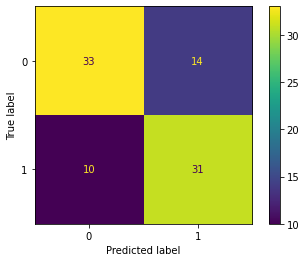

In [73]:
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt

plot_confusion_matrix(modelo_LogReg, x_test, y_test)

O gráfico acima indica o número de testes previstos corretamente ou incorretamente, tal qual como mostrado logo abaixo:

In [74]:
# Verdadeiro Positivo - Previ 1 e Verdade 1
VP = 23
# Verdadeiro Negativo - Previ 0 e Verdade 0
VN = 39
# Falso Positivo - Previ 1 e Verdade 0
FP = 8
# Falso Negativo - Previ 0 e Verdade 1
FN = 18

Podemos chegar ao mesmo valor da acurácia calculando:

In [75]:
(VN+VP)/(VN+VP+FP+FN)

0.7045454545454546

Por último temos uma métrica que tem a capacidade de separar muito bem os resultados positivos e negativos de um modelo em teste. Esta métrica é a AUC (área under the curve). Esta área é calculada a partir da curva ROC (Receiver Operator Characteristic), para mais informações a respeito desta curva visite o [link](https://www.youtube.com/watch?v=4jRBRDbJemM).



In [76]:
from sklearn.metrics import roc_auc_score

prob_logisticReg = modelo_LogReg.predict_proba(x_test) #Retorna matriz que indica chances da classe ser 0 (1ª coluna) e da classe ser 1 (2ª coluna)
roc_auc_score(y_test, prob_logisticReg[:,1]) #Informa a probabilidade da classe ser 1

0.7939802802283342

Com a métrica AUC, vamos criar uma função que medirá o grau de acertividade dos modelos criados posteriormente.

In [77]:
def roda_modelo(modelo, dados):

  x_columns = dados.columns
  y = dados["ICU"]
  x = dados[x_columns].drop(["ICU","WINDOW"], axis=1)

  x_train, x_test, y_train, y_test = train_test_split(x, y, stratify=y)

  modelo.fit(x_train, y_train)
  predicao = modelo.predict(x_test)
  prob_predic = modelo.predict_proba(x_test)

  auc = roc_auc_score(y_test, prob_predic[:,1])
  print(f"AUC {auc}")

In [78]:
teste1 = roda_modelo(modelo_LogReg, dados_limpos)
teste2 = roda_modelo(modelo_LogReg, dados_limpos)
teste3 = roda_modelo(modelo_LogReg, dados_limpos)

AUC 0.7296315516346653
AUC 0.7358588479501816
AUC 0.7431240269849507


Os testes mostrados anteriormente demonstram que a função ainda precisa ser melhorada. As aplicações estão gerando AUCs diferentes pois a função train_test_split possui uma condição randomica em que poe aleatoreamente os dados de teste e treino a cada vez que a função é chamada. 

Vamos refazer a função, sendo desta vez aplicando um pouco de estatística. Vamos rodar o modelo "n" vezes de modo a extrair um AUC médio com desvio padrão, dessse modo teremos um intervalo de acertividade do modelo.

In [79]:
import numpy as np
def roda_n_modelo(modelo, dados, n):

  x_columns = dados.columns
  y = dados["ICU"]
  x = dados[x_columns].drop(["ICU","WINDOW"], axis=1)

  auc_lista = []
  for _ in range(n):
    x_train, x_test, y_train, y_test = train_test_split(x, y, stratify=y)
    modelo.fit(x_train, y_train)
    prob_predic = modelo.predict_proba(x_test)
    auc = roc_auc_score(y_test, prob_predic[:,1])
    auc_lista.append(auc)

  auc_media = np.mean(auc_lista)
  auc_std = np.std(auc_lista)
  print(f"AUC {auc_media}")
  print(f"Intervalo [{auc_media - 2*auc_std},{auc_media + 2*auc_std}]")
  print(f"Diferença: {4*auc_std}")

In [80]:
teste1 = roda_n_modelo(modelo_LogReg, dados_limpos, 50)
print('')
teste2 = roda_n_modelo(modelo_LogReg, dados_limpos, 50)
print('')
teste3 = roda_n_modelo(modelo_LogReg, dados_limpos, 50)

AUC 0.7624078879086662
Intervalo [0.6757784689664875,0.8490373068508449]
Diferença: 0.17325883788435734

AUC 0.7644110015568241
Intervalo [0.6877692859976166,0.8410527171160316]
Diferença: 0.15328343111841503

AUC 0.7562740010378829
Intervalo [0.6702855311194882,0.8422624709562776]
Diferença: 0.17197693983678952


Agora é possível identificar que os testes possuem uma menor margem de acertividade.

Além disso, para melhor vizualização de curvas entre modelos, podemos plotar a curva ROC conforme mostrado abaixo. A título comparativo, iremos comparar o modelo Logistic Regression com o RandomForestClassifier.

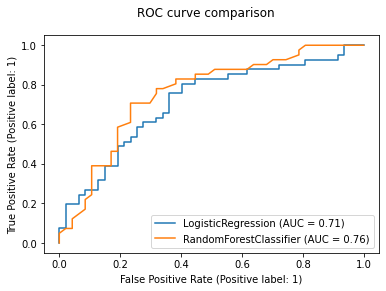

In [130]:
from sklearn.metrics import plot_roc_curve
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

x_columns = dados_limpos.columns
y = dados_limpos["ICU"]
x = dados_limpos[x_columns].drop(["ICU","WINDOW"], axis=1)

np.random.seed(73246)
x_train, x_test, y_train, y_test = train_test_split(x, y, stratify=y)

modelo_LogReg = LogisticRegression()
modelo_LogReg.fit(x_train, y_train)

modelo_RFC = RandomForestClassifier()
modelo_RFC.fit(x_train, y_train)

logisticReg_disp = plot_roc_curve(modelo_LogReg, x_test, y_test)
RFC_disp = plot_roc_curve(modelo_RFC, x_test, y_test, ax=logisticReg_disp.ax_)
RFC_disp.figure_.suptitle("ROC curve comparison")

plt.show()

Com o gráfico mostrado, é possível vizualizar que o modelo RandomForestClassifier possui melhor acertividade, o qual é comprovado pelo AUC calculado na legenda.

Podemos então incrementar nossa função para receber múltiplos modelos e plotar a ROC curve:

In [150]:
def roda_n_modelo_roc(modelo: list, dados, n):

  x_columns = dados.columns
  y = dados["ICU"]
  x = dados[x_columns].drop(["ICU","WINDOW"], axis=1)

  auc_lista_modelos = []
  auc_lista = []
  for i in range(len(modelo)):
    for _ in range(n):
      x_train, x_test, y_train, y_test = train_test_split(x, y, stratify=y)
      modelo[i].fit(x_train, y_train)
      prob_predic = modelo[i].predict_proba(x_test)
      auc = roc_auc_score(y_test, prob_predic[:,1])
      auc_lista.append(auc)
    auc_lista_modelos.append(auc_lista)

    #Média, Desvio Padrão e ROC do Modelo [i]
    auc_media = np.mean(auc_lista_modelos[i])
    auc_std = np.std(auc_lista_modelos[i])
    print(f"AUC Médio do Modelo {type(modelo[i]).__name__}: {auc_media:.4f}")
    print(f"Intervalo do Modelo {type(modelo[i]).__name__}: [{(auc_media - 2*auc_std):.4f},{(auc_media + 2*auc_std):.4f}]")
    print(f"Diferença: {4*auc_std:.4f}\n")
    if i==0:
      for _ in range(n):
        x_train, x_test, y_train, y_test = train_test_split(x, y, stratify=y)
        modelo[i].fit(x_train, y_train)
        prob_predic = modelo[i].predict_proba(x_test)
        auc = roc_auc_score(y_test, prob_predic[:,1])
        if abs(auc - auc_media) <= 0.005:
          modelo_disp = plot_roc_curve(modelo[i], x_test, y_test)
          break
    else:
      for _ in range(n):
        x_train, x_test, y_train, y_test = train_test_split(x, y, stratify=y)
        modelo[i].fit(x_train, y_train)
        prob_predic = modelo[i].predict_proba(x_test)
        auc = roc_auc_score(y_test, prob_predic[:,1])
        if abs(auc - auc_media) <= 0.005:
          modelo_disp = plot_roc_curve(modelo[i], x_test, y_test, ax=modelo_disp.ax_)
          break
    modelo_disp.figure_.suptitle("ROC curve comparison")

  plt.show()

AUC Médio do Modelo LogisticRegression: 0.7663
Intervalo do Modelo LogisticRegression: [0.6595,0.8732]
Diferença: 0.2137

AUC Médio do Modelo RandomForestClassifier: 0.7741
Intervalo do Modelo RandomForestClassifier: [0.6768,0.8714]
Diferença: 0.1946



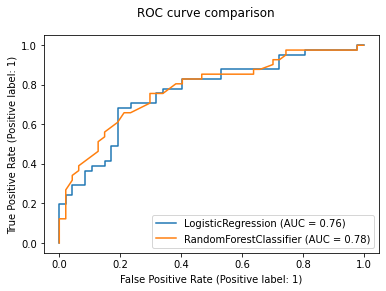

In [151]:
roda_n_modelo_roc([modelo_LogReg, modelo_RFC], dados_limpos, 50)

Por fim temos a última métrica que é o cross-validation que basicamente é....

Ou seja, dividimos nossos dados em 5 partes e utilizamos cada uma delas para teste. De modo a garantir não haja viés de ordem, ao invés de dividir em 5 partes ordenadas, utilizaremos a função sample para embaralhar os dados antes de fazer a divisão. Por fim, o RepeatedStratifiedKFold mantém a estratificação dos dados de modo que tenhamos aproximadamente a mesma proporção de resultados positivos (y=1) e negativos (y=0) entre os dados de treino e teste, além de possibilitar repetição da estratificação garantindo todos os testes necessários.

In [154]:
from sklearn.model_selection import cross_validate
from sklearn.model_selection import RepeatedStratifiedKFold
cv = RepeatedStratifiedKFold(n_splits = 5, n_repeats = 10)
resultados = cross_validate(modelo_LogReg, x, y, cv=cv)
resultados

{'fit_time': array([0.41783452, 0.20833492, 0.16825342, 0.15382218, 0.15984941,
        0.12033486, 0.16654158, 0.18088102, 0.32987714, 0.13830876,
        0.18297362, 0.14823461, 0.15304184, 0.17901587, 0.18613338,
        0.17429852, 0.19467473, 0.23026299, 0.13345289, 0.1387713 ,
        0.16393757, 0.19755793, 0.11611104, 0.18413854, 0.11751533,
        0.31656861, 0.18683553, 0.10244346, 0.05788803, 0.07125902,
        0.06007099, 0.17175937, 0.15461588, 0.16069841, 0.15146971,
        0.10530877, 0.14340854, 0.12371659, 0.13062716, 0.14143848,
        0.1403563 , 0.17022777, 0.11246204, 0.16290784, 0.13759279,
        0.12755036, 0.1267066 , 0.15710592, 0.12542558, 0.10240674]),
 'score_time': array([0.02077365, 0.01245213, 0.01163697, 0.01386285, 0.00756264,
        0.01246548, 0.00800824, 0.01325178, 0.01359296, 0.01594901,
        0.01346612, 0.01713157, 0.01555014, 0.00881171, 0.01718283,
        0.01447082, 0.01318836, 0.01385283, 0.01474118, 0.00762296,
        0.0187993 , 

Agora podemos aplicar o cross validate na nossa função.

In [193]:
def roda_cv_modelo(modelo: list, dados, n_splits, n_repeats):

  np.random.seed(1231234) # seed para garantir a reprodutibilidade do teste
  dados = dados.sample(frac=1).reset_index(drop=True) #embaralha os dados recebidos para evitar viés de ordem
  x_columns = dados.columns
  y = dados["ICU"]
  x = dados[x_columns].drop(["ICU","WINDOW"], axis=1)

  resultados_lista = []
  for i in range(len(modelo)):
    cv = RepeatedStratifiedKFold(n_splits = n_splits, n_repeats = n_repeats)
    resultados = cross_validate(modelo[i], x, y, cv=cv, scoring='roc_auc') #teste score retorna como padrão a acurácia, com o "scoring='roc_auc'" nós garantimos que o retorno do teste score seja a AUC 

    #Média e Desvio Padrão
    auc_media = np.mean(resultados['test_score'])
    auc_std = np.std(resultados['test_score'])
    print(f"AUC Médio do Modelo {type(modelo[i]).__name__}: {auc_media:.4f}")
    print(f"Intervalo do Modelo {type(modelo[i]).__name__}: [{(auc_media - 2*auc_std):.4f},{(auc_media + 2*auc_std):.4f}]")
    print(f"Diferença: {4*auc_std:.4f}\n") 

In [194]:
roda_cv_modelo([modelo_LogReg, modelo_RFC], dados_limpos, 5, 10)

AUC Médio do Modelo LogisticRegression: 0.7581
Intervalo do Modelo LogisticRegression: [0.6365,0.8798]
Diferença: 0.2434

AUC Médio do Modelo RandomForestClassifier: 0.7824
Intervalo do Modelo RandomForestClassifier: [0.6789,0.8858]
Diferença: 0.2070



### 3.3.Comparativo de Modelos de Machine Learning aplicados neste projeto

Serão utilizados os seguintes modelos classificatórios:


*   Logistic Regression
*   DecisionTreeClassifier
*   RandomForestClassifier
*   Support Vector Classification (SVC)
*   Stochastic Gradient Descent (SGD)




Importando todos os modelos

In [197]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier

Adicionando os modelos em variáveis e chamando a função:

In [199]:
modelo_LogReg = LogisticRegression()
modelo_DecTree = DecisionTreeClassifier()
modelo_RFC = RandomForestClassifier()
modelo_SVC = SVC()
modelo_SGD = SGDClassifier()
roda_cv_modelo([modelo_LogReg, modelo_DecTree, modelo_RFC, modelo_SVC, modelo_SGD], dados_limpos, 10, 10)

AUC Médio do Modelo LogisticRegression: 0.7603
Intervalo do Modelo LogisticRegression: [0.5868,0.9338]
Diferença: 0.3470

AUC Médio do Modelo DecisionTreeClassifier: 0.6277
Intervalo do Modelo DecisionTreeClassifier: [0.4733,0.7820]
Diferença: 0.3087

AUC Médio do Modelo RandomForestClassifier: 0.7897
Intervalo do Modelo RandomForestClassifier: [0.6337,0.9458]
Diferença: 0.3121

AUC Médio do Modelo SVC: 0.7003
Intervalo do Modelo SVC: [0.5119,0.8887]
Diferença: 0.3767

AUC Médio do Modelo SGDClassifier: 0.6633
Intervalo do Modelo SGDClassifier: [0.4554,0.8713]
Diferença: 0.4158



Rodando apenas os modelos diretamente, a ordem de classificação de uso de acordo com o AUC ficaria assim:


1.   RandomForestClassifier
2.   LogisticRegression
3.   SVC
4.   SGDClassifier
5.   DecisionTreeClassifier

Agora vamos alterar os hiperparâmetros na intenção de extrair o melhor de cada modelo.

### 3.4.Aplicação de Hiperparâmetros

A variação dos hiperparâmetros auxiliam o modelo a se adequar melhor as condições dos dados de treino. Porém, conforme o modelo se adequa ao treino ele não consegue generalizar para os dados de teste. Será visto a modificação de pelo menos um hiperparâmetro de cada modelo.

#### 3.4.1.Logistic Regression

#### 3.4.2.DecisionTreeClassifier

In [200]:
def roda_cv_modelo(modelo: list, dados, n_splits, n_repeats):

  np.random.seed(1231234) # seed para garantir a reprodutibilidade do teste
  dados = dados.sample(frac=1).reset_index(drop=True) #embaralha os dados recebidos para evitar viés de ordem
  x_columns = dados.columns
  y = dados["ICU"]
  x = dados[x_columns].drop(["ICU","WINDOW"], axis=1)

  resultados_lista = []
  for i in range(len(modelo)):
    cv = RepeatedStratifiedKFold(n_splits = n_splits, n_repeats = n_repeats)
    resultados = cross_validate(modelo[i], x, y, cv=cv, scoring='roc_auc', return_train_score=True) #teste score retorna como padrão a acurácia, com o "scoring='roc_auc'" nós garantimos que o retorno do teste score seja a AUC 

    #Média e Desvio Padrão
    auc_media = np.mean(resultados['test_score'])
    auc_medio_treino = np.mean(resultados['train_score'])
    auc_std = np.std(resultados['test_score'])
    print(f"AUC Teste: {auc_media} / AUC Treino: {auc_medio_treino}")
    # print(f"AUC Médio do Modelo {type(modelo[i]).__name__}: {auc_media:.4f}")
    # print(f"Intervalo do Modelo {type(modelo[i]).__name__}: [{(auc_media - 2*auc_std):.4f},{(auc_media + 2*auc_std):.4f}]")
    # print(f"Diferença: {4*auc_std:.4f}\n") 
  return  auc_media, auc_medio_treino

In [201]:
pltTest = []
pltTreino = []
for i in range(1, 15):
  modelo_DecTree = DecisionTreeClassifier(max_depth=i)
  teste, treino = roda_cv_modelo([modelo_DecTree], dados_limpos, 5, 10)
  pltTest.append(teste)
  pltTreino.append(treino)

AUC Teste: 0.5798942303547566 / AUC Treino: 0.6440435618709074
AUC Teste: 0.6653365918250788 / AUC Treino: 0.7543145049885313
AUC Teste: 0.6660804142958748 / AUC Treino: 0.8235263796977718
AUC Teste: 0.6571569827902066 / AUC Treino: 0.8806069395866519
AUC Teste: 0.6544644771865167 / AUC Treino: 0.9242201964241233
AUC Teste: 0.627418046036467 / AUC Treino: 0.9535419804603322
AUC Teste: 0.6115986613108324 / AUC Treino: 0.9708382910276434
AUC Teste: 0.5999026089486617 / AUC Treino: 0.9820570453449073
AUC Teste: 0.6079126726906332 / AUC Treino: 0.9891897091727289
AUC Teste: 0.6110574472498814 / AUC Treino: 0.9933814849781217
AUC Teste: 0.6081317015280832 / AUC Treino: 0.9960267776279818
AUC Teste: 0.6199784136708478 / AUC Treino: 0.9979319054015968
AUC Teste: 0.6269285516078279 / AUC Treino: 0.9991653716751056
AUC Teste: 0.623172382160869 / AUC Treino: 0.9996792443552445


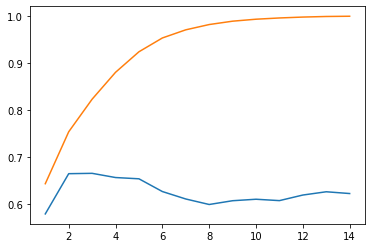

In [202]:
x = range(1,15)
plt.plot(x, pltTest)
plt.plot(x, pltTreino)

#### 3.4.3.RandomForestClassifier

In [203]:
pltTest = []
pltTreino = []
for i in range(1, 15):
  modelo_RFC = RandomForestClassifier(max_depth=i)
  teste, treino = roda_cv_modelo([modelo_RFC], dados_limpos, 5, 10)
  pltTest.append(teste)
  pltTreino.append(treino)

AUC Teste: 0.7700774548471918 / AUC Treino: 0.8491063957521091
AUC Teste: 0.7819369908185696 / AUC Treino: 0.8936214918489034
AUC Teste: 0.7883157813914394 / AUC Treino: 0.9381779274042671
AUC Teste: 0.7933588328160698 / AUC Treino: 0.9698102280702439
AUC Teste: 0.7902070940557782 / AUC Treino: 0.9880263077049973
AUC Teste: 0.796019386611492 / AUC Treino: 0.9959242006141334
AUC Teste: 0.7942191473770421 / AUC Treino: 0.9990624228520928
AUC Teste: 0.7928359115694643 / AUC Treino: 0.9998377120153944
AUC Teste: 0.7931212552265184 / AUC Treino: 0.9999817588627864
AUC Teste: 0.7920856367731369 / AUC Treino: 1.0
AUC Teste: 0.7915111171278937 / AUC Treino: 1.0
AUC Teste: 0.7926436080218976 / AUC Treino: 1.0
AUC Teste: 0.7916026822276823 / AUC Treino: 1.0
AUC Teste: 0.7913580124682099 / AUC Treino: 1.0


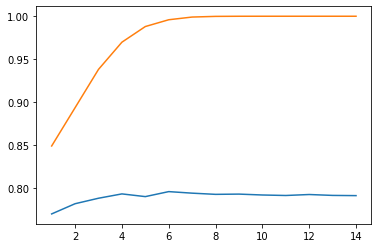

In [204]:
import matplotlib.pyplot as plt
x = range(1,15)
plt.plot(x, pltTest)
plt.plot(x, pltTreino)

#### 3.4.4.Support Vector Classification (SVC)

#### 3.4.5.Stochastic Gradient Descent (SGD)